In [159]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, spearmanr
import numpy as np

In [160]:
# Load the csv file
real_df = pd.read_csv("NYC TLC Trip Record.csv")

# Backup df
df = real_df.copy()

# Display the first few rows of the DataFrame
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_12148\1721073245.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  real_df = pd.read_csv("NYC TLC Trip Record.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [161]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [162]:
# Rename columns to conform to PEP8 standards
df = df.rename(columns={
    "VendorID": "vendor_id",
    "tpep_pickup_datetime": "pickup_datetime",
    "tpep_dropoff_datetime": "dropoff_datetime",
    "passenger_count": "passenger_count",
    "trip_distance": "trip_distance",
    "RatecodeID": "rate_code_id",
    "store_and_fwd_flag": "store_and_fwd_flag",
    "PULocationID": "pickup_location_id",
    "DOLocationID": "dropoff_location_id",
    "payment_type": "payment_type",
    "fare_amount": "fare_amount",
    "extra": "extra",
    "mta_tax": "mta_tax",
    "tip_amount": "tip_amount",
    "tolls_amount": "tolls_amount",
    "improvement_surcharge": "improvement_surcharge",
    "total_amount": "total_amount",
    "congestion_surcharge": "congestion_surcharge",
    "Trip_type": "trip_type"
})


In [163]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [164]:
# Display summary statistics
df.describe()

,vendor_id,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendor_id              68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   rate_code_id           63887 non-null  float64
 5   pickup_location_id     68211 non-null  int64  
 6   dropoff_location_id    68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [166]:
df.isnull().sum()

vendor_id                    0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
rate_code_id              4324
pickup_location_id           0
dropoff_location_id          0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [167]:
# Treat NA rows

In [168]:
# MCAR
df = df.drop(columns=["ehail_fee"])

In [169]:
# MAR
for column in ["store_and_fwd_flag", "rate_code_id", "payment_type"]:
    df[column] = df[column].fillna(df[column].mode()[0])

for column in ["passenger_count", "congestion_surcharge"]:
    df[column] = df[column].fillna(df[column].median())

In [170]:
# MNAR
mnar = ["trip_type"]
df["trip_type"] = df["trip_type"].fillna(df["trip_type"].mode()[0])

In [171]:
df.isnull().sum()

vendor_id                0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
rate_code_id             0
pickup_location_id       0
dropoff_location_id      0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [172]:
# Check for duplicate rows
df.duplicated().sum()

0

In [173]:
# Convert datetime columns to datetime type
for column in ["lpep_pickup_datetime", "lpep_dropoff_datetime"]:
    df[column] = pd.to_datetime(df[column])

In [174]:
# Convert categorical columns to category type
for column in ["vendor_id", "store_and_fwd_flag", "rate_code_id", "payment_type", "trip_type", "pickup_location_id", "dropoff_location_id"]:
    df[column] = df[column].astype("category")

In [175]:
# Calculate trip duration in minutes
df["trip_duration"] = round((df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]).dt.total_seconds() / 60, 2)

In [176]:
# Extract hour, day of week, and month from pickup datetime
df["pickup_hour"] = df["lpep_pickup_datetime"].dt.hour
df["pickup_day_of_week"] = df["lpep_pickup_datetime"].dt.dayofweek
df["pickup_month"] = df["lpep_pickup_datetime"].dt.month

In [177]:
# Map VendorID to vendor_name
vendor_mapping = {
    1: "Creative Mobile Technologies, LLC.",
    2: "VeriFone Inc."
}
df["vendor_name"] = df["vendor_id"].map(vendor_mapping)

In [178]:
# Map RatecodeID to rate_code_id
rate_code_mapping = {
    1: "Standard Rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated Fare",
    6: "Group Ride",
    0: "Unknown",
    99: "Unknown"
}
df["rate_code_name"] = df["rate_code_id"].map(rate_code_mapping)

In [179]:
# Map store_and_fwd_flag to store_and_fwd_flag
store_and_fwd_mapping = {
    "Y": "Store and Forward Trip",
    "N": "Not A Store and Forward Trip",
    0 : "Unknown"
}
df["store_and_fwd_flag_name"] = df["store_and_fwd_flag"].map(store_and_fwd_mapping)

In [180]:
# Map Payment_type to payment_type
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip",
    0: "Unkown"
}
df["payment_type_name"] = df["payment_type"].map(payment_type_mapping)

In [181]:
# Map Trip_type to trip_type
trip_type_mapping = {
    1: "Street-hail",
    2: "Dispatch",
    0: "Unknown"
}
df["trip_type_name"] = df["trip_type"].map(trip_type_mapping)

In [182]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail


In [183]:
for column in ["rate_code_id", "passenger_count"]:
    df[column] = df[column].apply(lambda x: int(x))

In [184]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,...,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,...,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,...,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,...,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,...,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail


In [185]:
df = df.sort_values(by="lpep_pickup_datetime", ascending=True)

In [186]:
df.to_csv("NYC TLC Trip Record - Clean.csv", index=False, sep = ";")

In [187]:
df.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month
count,68211,68211,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000
mean,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,1.295847,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,0.680678,18.097274,13.814707,2.848749,1.000337
min,2009-01-01 20:21:27,2009-01-02 11:07:31,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,-2.750000,0.000000,0.000000,0.000000,1.000000
25%,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,0.000000,7.220000,10.000000,1.000000,1.000000
50%,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,0.000000,11.400000,14.000000,3.000000,1.000000
75%,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,0.000000,17.480000,18.000000,4.000000,1.000000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,2.750000,1439.880000,23.000000,6.000000,12.000000
std,NaN,NaN,0.950635,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,1.187047,74.925634,5.230998,1.961776,0.059686


In [188]:
results = []

for column in df:
    if df[column].dtype in ["float64","int64", "int32"]:
        stats, pval = shapiro(df[column])
        results.append([column,stats,pval])

shapiro_df = pd.DataFrame(results, columns=["column", "statistic", "p_value"])
shapiro_df["alpha"] = 0.05
shapiro_df["reject_h0"] = shapiro_df["p_value"] <= shapiro_df["alpha"]

c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68211.
  res = hypotest_fun_out(*samples, **kwds)


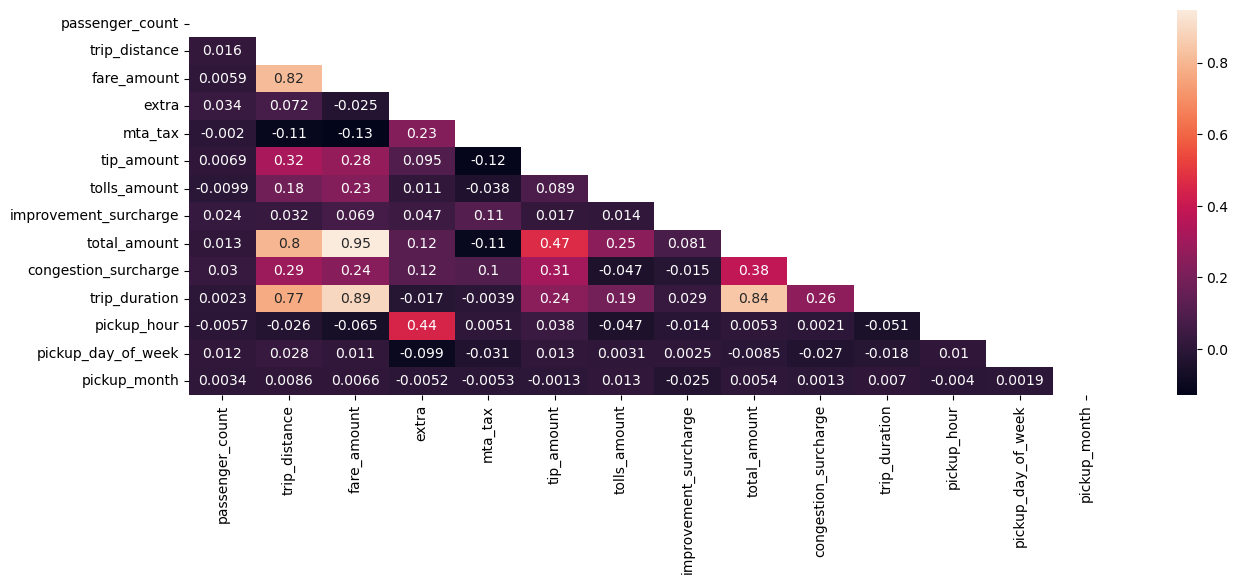

In [189]:
spearman_matrix = df.corr(numeric_only=True, method="spearman")
mask = np.triu(np.ones_like(spearman_matrix)) 
plt.figure(figsize=(15,5))
corr_map = sns.heatmap(spearman_matrix, annot=True, mask=mask) 
plt.show(corr_map)

In [190]:
columns = [column for column in df if df[column].dtype in ["float64", "int64", "int32"]]
results = []
for length in columns:
    for width in columns:
        stats, pval = spearmanr(df[length], df[width])
        results.append([length, width, stats])

spearman_df = pd.DataFrame(results, columns=["col_1", "col_2", "correlation_value"])
spearman_df = spearman_df[spearman_df["col_2"] != spearman_df ["col_1"]]
spearman_df = spearman_df.sort_values(by="correlation_value",ascending=False).reset_index().drop(columns=["index"])
spearman_df["odd_even"] = spearman_df.index % 2
spearman_df = spearman_df[spearman_df["odd_even"]==0]
spearman_df = spearman_df.drop(columns=["odd_even"])
spearman_df

,col_1,col_2,correlation_value
0,total_amount,fare_amount,0.947950
2,fare_amount,trip_duration,0.890383
4,total_amount,trip_duration,0.843056
6,fare_amount,trip_distance,0.816941
8,trip_distance,total_amount,0.799851
...,...,...,...
172,pickup_day_of_week,extra,-0.099320
174,mta_tax,total_amount,-0.106919
176,trip_distance,mta_tax,-0.109032
178,mta_tax,tip_amount,-0.116728


In [191]:
spearman_df["direction"] = spearman_df["correlation_value"].apply(lambda x: "Directly Proportional" if x>=0 else "Inversely Proportional")
spearman_df["correlation_power"] = spearman_df["correlation_value"].apply(lambda x: "Strong" if 0.7<=x<=1 else "Moderate" if 0.3<=x<0.7 else "Weak")

In [192]:
spearman_df

,col_1,col_2,correlation_value,direction,correlation_power
0,total_amount,fare_amount,0.947950,Directly Proportional,Strong
2,fare_amount,trip_duration,0.890383,Directly Proportional,Strong
4,total_amount,trip_duration,0.843056,Directly Proportional,Strong
6,fare_amount,trip_distance,0.816941,Directly Proportional,Strong
8,trip_distance,total_amount,0.799851,Directly Proportional,Strong
...,...,...,...,...,...
172,pickup_day_of_week,extra,-0.099320,Inversely Proportional,Weak
174,mta_tax,total_amount,-0.106919,Inversely Proportional,Weak
176,trip_distance,mta_tax,-0.109032,Inversely Proportional,Weak
178,mta_tax,tip_amount,-0.116728,Inversely Proportional,Weak


In [199]:
columns = ["vendor_id", "rate_code_id", "store_and_fwd_flag", "pickup_location_id", "dropoff_location_id", "payment_type", "trip_type"]
df.describe(include=["category", "object"]).drop(columns=columns)

,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
count,68211,68211,68211,68211,68211
unique,2,6,2,5,2
top,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
freq,58868,66427,67903,45010,66810
